Dataset Description:

In this project,we build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. 

In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

In [3]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the dataset(Creating the dataframe)
df=pd.read_csv('data.csv')

In [5]:
pd.set_option('display.max_rows',None)

In [6]:
df.head()   #first five rows of the dataset

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [7]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [8]:
df.shape    #checking the shape of the dataset

(209593, 37)

In [9]:
#Checking the datatypes
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [10]:
#Checking the null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

No null values in the dataset

In [11]:
#Unnamed: 0--This column is of no use,so we can remove

df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
#EDA
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

1--The user has paid back the credit amount within 5 days of issuing the loan(total users=183431)

0--The user was not able to pay back the credit amount within 5 days of issuing the loan(total users=26162)

In [13]:
#msisdn--mobile number of user,this column is not playing any significant role,so we can remove it
df.drop('msisdn',axis=1,inplace=True)

In [14]:
#df['aon'].value_counts()  #aon---age on cellular network in days

In [15]:
#df['daily_decr30'].value_counts()

In [16]:
df['daily_decr90'].value_counts()

 0.000000         4063
 500.000000        781
 1000.000000       490
 700.000000        343
 600.000000        316
 800.000000        270
 1500.000000       198
 900.000000        172
 1200.000000       155
 1300.000000       140
 8.000000          125
 2300.000000       121
 1700.000000       119
 2000.000000       115
 1400.000000       114
 2500.000000       112
 1600.000000       108
 7.000000           94
 2100.000000        92
 4.000000           85
 1100.000000        83
 950.000000         81
 1800.000000        75
 5.600000           72
 12.000000          72
 2200.000000        71
 6.000000           70
 15.000000          69
 2400.000000        68
 2.000000           68
 10.000000          67
 3.200000           67
 7.500000           66
 20.000000          66
 650.000000         65
 2600.000000        64
 3300.000000        63
 1.000000           61
 0.200000           59
 3.000000           58
 1015.000000        58
 5.000000           58
 11.000000          57
 16.000000 

In [17]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

We can remove the above column as it is of no use,it is only telling about the telecom circle.

In [18]:
df.drop('pcircle',axis=1,inplace=True)

In [19]:
#'pdate' column is only telling the date and this doesnot draw any important link with the target variable,so we can remove it
df.drop('pdate',axis=1,inplace=True)

In [18]:
#Checking the first five rows of the dataset after dropping some columns
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0            2            12              6.0                 0.0   
1            1            12             12.0                 0.0   
2            1             6              6.0                 0.0   
3            2            12              6.0                 0.0   
4            7            42              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90  
0  29.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   2.333333  

[5 rows x 33 columns]

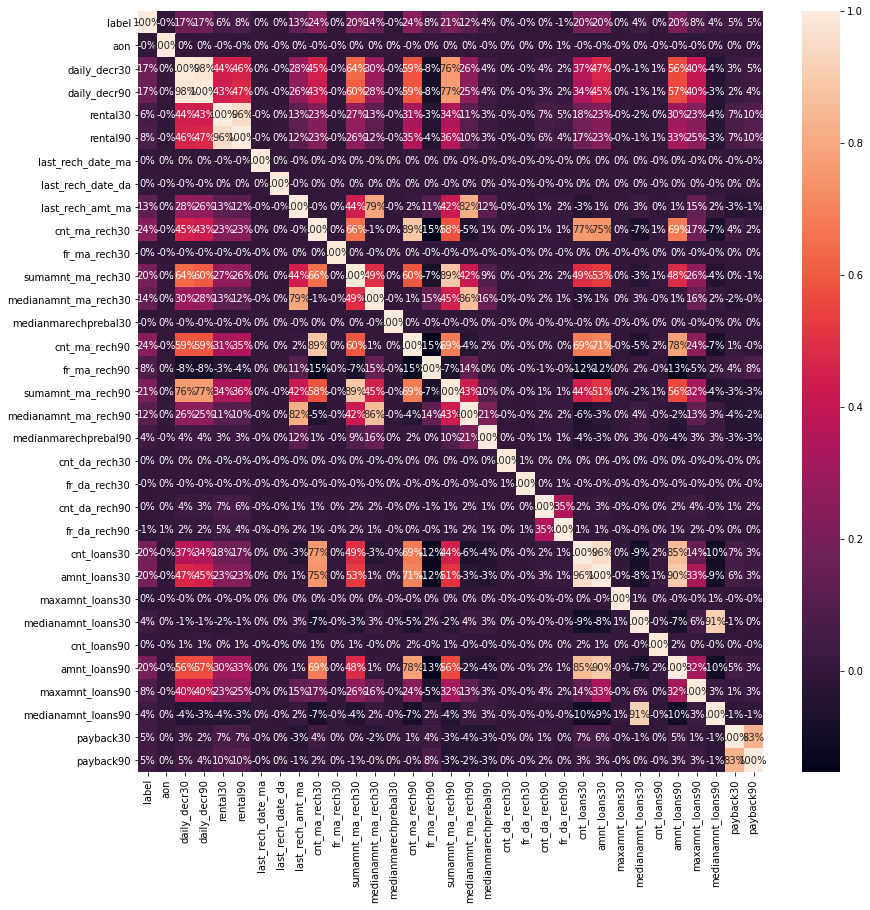

In [19]:
#Heatmap to show the correlation among the datas
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

There are some columns which are 0% correlated with the target,so we can remove those columns. 

In [20]:
df.drop('aon',axis=1,inplace=True)
df.drop('last_rech_date_ma',axis=1,inplace=True)
df.drop('last_rech_date_da',axis=1,inplace=True)
df.drop('fr_ma_rech30',axis=1,inplace=True)
df.drop('medianmarechprebal30',axis=1,inplace=True)
df.drop('cnt_da_rech30',axis=1,inplace=True)
df.drop('fr_da_rech30',axis=1,inplace=True)
df.drop('fr_da_rech90',axis=1,inplace=True)
df.drop('cnt_da_rech90',axis=1,inplace=True)
df.drop('maxamnt_loans30',axis=1,inplace=True)
df.drop('cnt_loans90',axis=1,inplace=True)

In [21]:
#Lets have a look on our modified dataframe
df.head()

label  daily_decr30  daily_decr90  rental30  rental90  last_rech_amt_ma  \
0      0   3055.050000   3065.150000    220.13    260.13              1539   
1      1  12122.000000  12124.750000   3691.26   3691.26              5787   
2      1   1398.000000   1398.000000    900.13    900.13              1539   
3      1     21.228000     21.228000    159.42    159.42               947   
4      1    150.619333    150.619333   1098.90   1098.90              2309   

   cnt_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  ...  \
0              2             3078.0                1539.0              2  ...   
1              1             5787.0                5787.0              1  ...   
2              1             1539.0                1539.0              1  ...   
3              0                0.0                   0.0              1  ...   
4              7            20029.0                2309.0              8  ...   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_loans30  amnt_loans30  \
0                1539.0                  7.50            2            12   
1                5787.0                 61.04            1            12   
2                1539.0                 66.32            1             6   
3                 947.0                  2.50            2            12   
4                2888.0                 35.00            7            42   

   medianamnt_loans30  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0                 0.0            12                6                 0.0   
1                 0.0            12               12                 0.0   
2                 0.0             6                6                 0.0   
3                 0.0            12                6                 0.0   
4                 0.0            42                6                 0.0   

   payback30  payback90  
0  29.000000  29.000000  
1   0.000000   0.000000  
2   0.000000   0.000000  
3   0.000000   0.000000  
4   2.333333   2.333333  

[5 rows x 22 columns]

In [22]:
#Describe the dataset
df.describe().T       #T-transpose

count          mean           std           min  \
label                 209593.0      0.875177      0.330519      0.000000   
daily_decr30          209593.0   5381.402289   9220.623400    -93.012667   
daily_decr90          209593.0   6082.515068  10918.812767    -93.012667   
rental30              209593.0   2692.581910   4308.586781 -23737.140000   
rental90              209593.0   3483.406534   5770.461279 -24720.580000   
last_rech_amt_ma      209593.0   2064.452797   2370.786034      0.000000   
cnt_ma_rech30         209593.0      3.978057      4.256090      0.000000   
sumamnt_ma_rech30     209593.0   7704.501157  10139.621714      0.000000   
medianamnt_ma_rech30  209593.0   1812.817952   2070.864620      0.000000   
cnt_ma_rech90         209593.0      6.315430      7.193470      0.000000   
fr_ma_rech90          209593.0      7.716780     12.590251      0.000000   
sumamnt_ma_rech90     209593.0  12396.218352  16857.793882      0.000000   
medianamnt_ma_rech90  209593.0   1864.595821   2081.680664      0.000000   
medianmarechprebal90  209593.0     92.025541    369.215658   -200.000000   
cnt_loans30           209593.0      2.758981      2.554502      0.000000   
amnt_loans30          209593.0     17.952021     17.379741      0.000000   
medianamnt_loans30    209593.0      0.054029      0.218039      0.000000   
amnt_loans90          209593.0     23.645398     26.469861      0.000000   
maxamnt_loans90       209593.0      6.703134      2.103864      0.000000   
medianamnt_loans90    209593.0      0.046077      0.200692      0.000000   
payback30             209593.0      3.398826      8.813729      0.000000   
payback90             209593.0      4.321485     10.308108      0.000000   

                           25%          50%       75%        max  
label                    1.000     1.000000      1.00       1.00  
daily_decr30            42.440  1469.175667   7244.00  265926.00  
daily_decr90            42.692  1500.000000   7802.79  320630.00  
rental30               280.420  1083.570000   3356.94  198926.11  
rental90               300.260  1334.000000   4201.79  200148.11  
last_rech_amt_ma       770.000  1539.000000   2309.00   55000.00  
cnt_ma_rech30            1.000     3.000000      5.00     203.00  
sumamnt_ma_rech30     1540.000  4628.000000  10010.00  810096.00  
medianamnt_ma_rech30   770.000  1539.000000   1924.00   55000.00  
cnt_ma_rech90            2.000     4.000000      8.00     336.00  
fr_ma_rech90             0.000     2.000000      8.00      88.00  
sumamnt_ma_rech90     2317.000  7226.000000  16000.00  953036.00  
medianamnt_ma_rech90   773.000  1539.000000   1924.00   55000.00  
medianmarechprebal90    14.600    36.000000     79.31   41456.50  
cnt_loans30              1.000     2.000000      4.00      50.00  
amnt_loans30             6.000    12.000000     24.00     306.00  
medianamnt_loans30       0.000     0.000000      0.00       3.00  
amnt_loans90             6.000    12.000000     30.00     438.00  
maxamnt_loans90          6.000     6.000000      6.00      12.00  
medianamnt_loans90       0.000     0.000000      0.00       3.00  
payback30                0.000     0.000000      3.75     171.50  
payback90                0.000     1.666667      4.50     171.50

In [23]:
#Lets check the data distribution among all columns
#df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,fontsize=1,figsize=(18,12))
#plt.show()

In [24]:
#Checking the columns of the dataset
df.columns

Index(['label', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'medianamnt_loans30', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

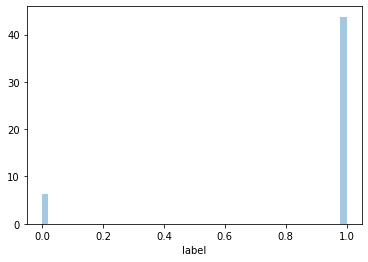

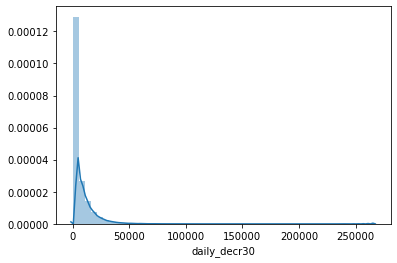

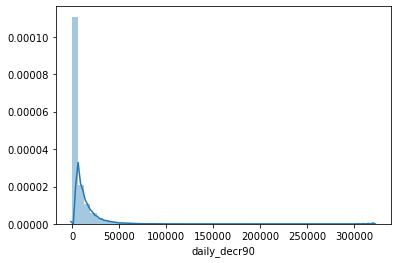

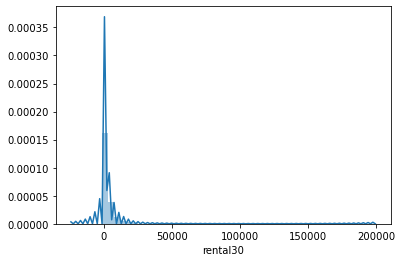

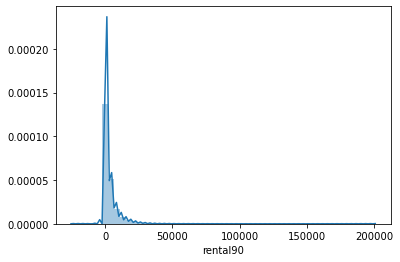

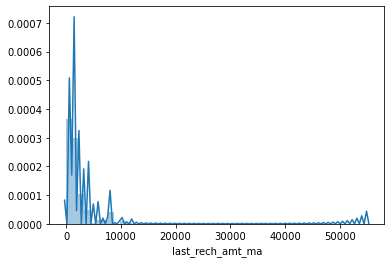

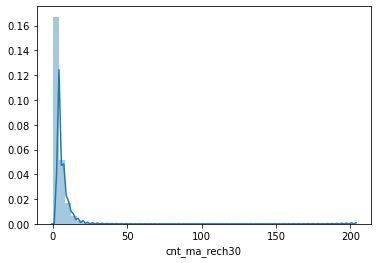

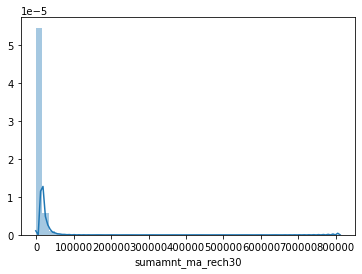

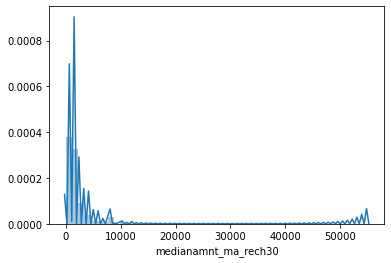

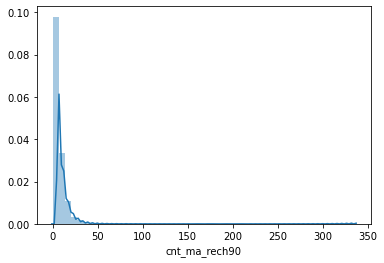

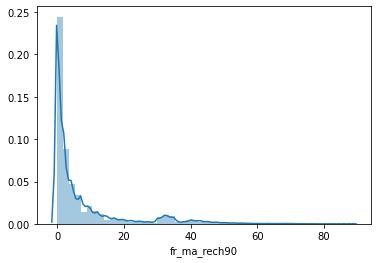

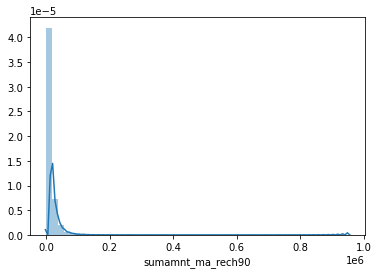

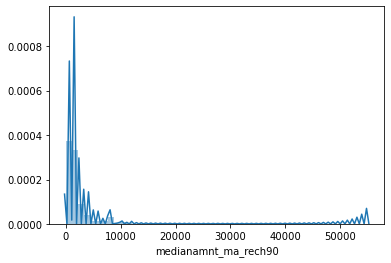

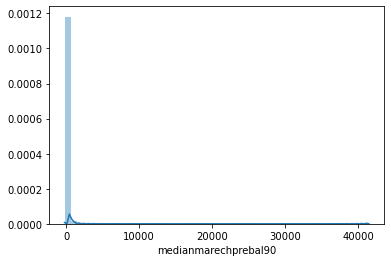

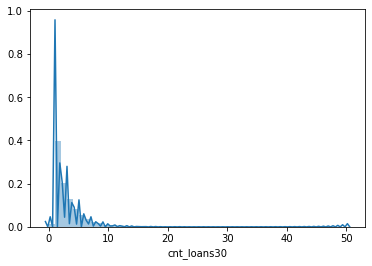

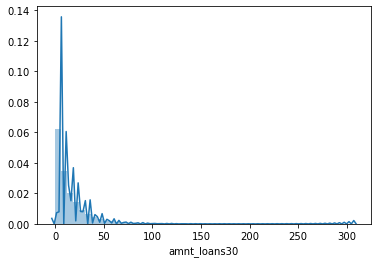

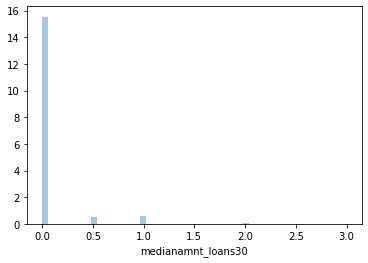

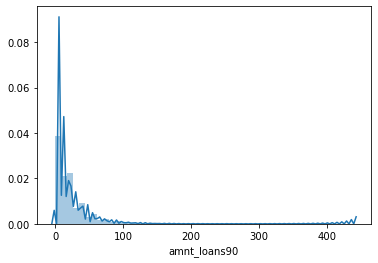

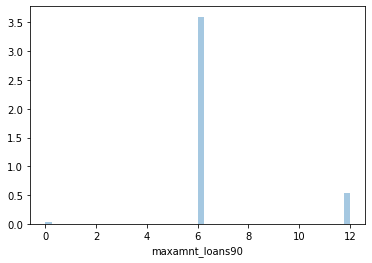

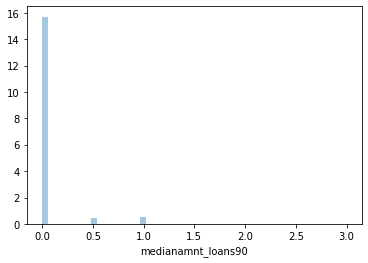

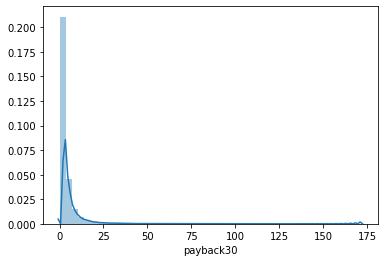

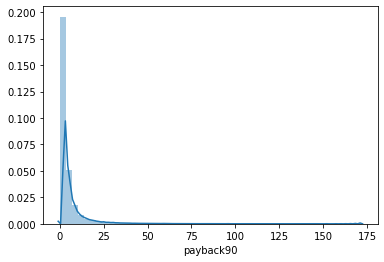

In [25]:
columns=['label', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'medianamnt_loans30', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

From the above visualization,we get a clear view and can see there is skewness in the data.So we have to deal with it in our future steps.

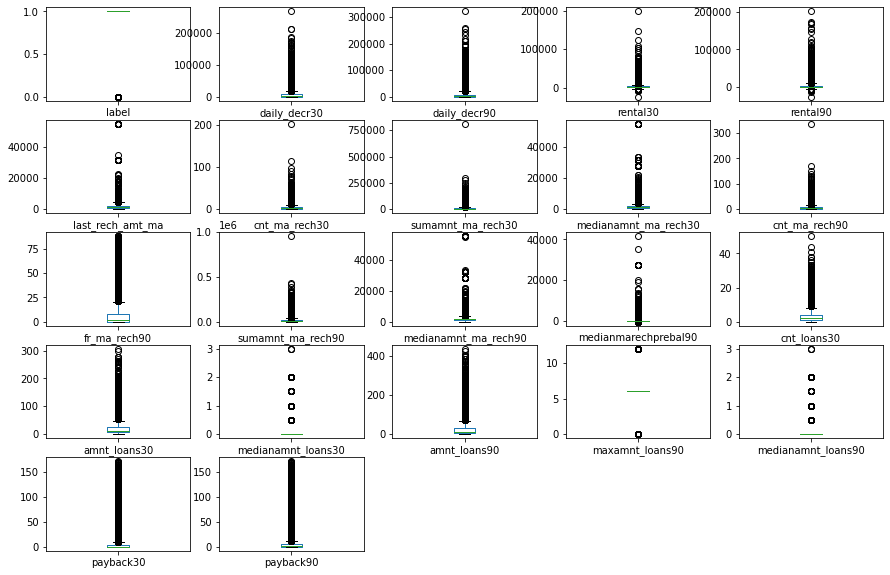

In [26]:
#Checking outliers using boxplots
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10));

Outliers are present which are clearly visible from the boxplots.Now we have to remove to make our dataset clean.

In [27]:
#Removing outliers using zscore
z=np.abs(zscore(df))
z

array([[2.64789583, 0.25229941, 0.27634619, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.73103667, 0.5533797 , ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.43201111, 0.42903256, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.70079045, 0.53319431, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.77075515, 0.59455827, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.09674426, 0.14174607, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [28]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([10, 10, 21, ..., 17, 16, 19], dtype=int64))


In [29]:
print('shape before removing the outliers:',df.shape)
dfnew=df[(z<3).all(axis=1)]
print('shape after removing the outliers:',dfnew.shape)

shape before removing the outliers: (209593, 22)
shape after removing the outliers: (170481, 22)


In [30]:
#%data loss calculation
loss_percent=(209593-170481)/209593*100
print(loss_percent)

18.66092856154547


19% data loss is not acceptable,but as the dataset is too huge ,we can go with the data loss of 19%.

In [31]:
#Checking the skewness in data
dfnew.skew()

label                  -2.087816
daily_decr30            1.955018
daily_decr90            2.069899
rental30                2.182896
rental90                2.228026
last_rech_amt_ma        2.123872
cnt_ma_rech30           1.172535
sumamnt_ma_rech30       1.630531
medianamnt_ma_rech30    2.323886
cnt_ma_rech90           1.316931
fr_ma_rech90            1.983599
sumamnt_ma_rech90       1.703172
medianamnt_ma_rech90    2.371528
medianmarechprebal90    3.701551
cnt_loans30             1.463447
amnt_loans30            1.437650
medianamnt_loans30      5.349342
amnt_loans90            1.689485
maxamnt_loans90         2.671380
medianamnt_loans90      6.101962
payback30               2.605210
payback90               2.520806
dtype: float64

In [32]:
#Splitting the independent and target variable in x and y 
x=dfnew.drop(['label'],axis=1)
y=dfnew['label']

We can see skewness in the dataset,we will remove the skewness using power_transform function.

In [33]:
#Removing skewness using power transform method
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [34]:
df_new.skew()

daily_decr30           -1.873802
daily_decr90           -1.993720
rental30                0.204445
rental90                0.230526
last_rech_amt_ma       -0.184739
cnt_ma_rech30          -0.026795
sumamnt_ma_rech30      -0.457504
medianamnt_ma_rech30   -0.312192
cnt_ma_rech90          -0.030296
fr_ma_rech90            0.141719
sumamnt_ma_rech90      -0.365359
medianamnt_ma_rech90   -0.174301
medianmarechprebal90    0.994812
cnt_loans30             0.086830
amnt_loans30           -0.003025
medianamnt_loans30      5.349342
amnt_loans90            0.122396
maxamnt_loans90         2.671380
medianamnt_loans90      6.101962
payback30               0.305664
payback90               0.207624
dtype: float64

Skewness is minimised.

In [35]:
x=df_new

In [36]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

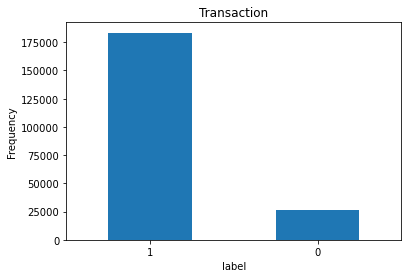

In [37]:
count_classes=pd.value_counts(df['label'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Transaction')
plt.xlabel('label')
plt.ylabel('Frequency')

In [38]:
#Handling Imbalanced Data-Over Sampling
Defaulter=df[df['label']==0]
NDefaulter=df[df['label']==1]

In [39]:
print(Defaulter.shape,NDefaulter.shape)

(26162, 22) (183431, 22)


In [40]:
#!pip install imbalanced-learn

In [41]:
#conda update scikit-learn

In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [43]:
#Implementing oversampling for handling Imbalanced
#smk=SMOTETomek(random_state=42)

In [44]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x_res,y_res=os.fit_resample(x,y)
x_res.shape,y_res.shape

((293590, 21), (293590,))

After oversampling, size of dataset becomes 293590 which was originally 26162

In [45]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 146795, 0: 23686})
Resampled dataset shape Counter({0: 146795, 1: 146795})


In [46]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data=scale.fit_transform(x)

In [47]:
#Model building
#I will be using Balanced RandomForestClassifier which  can be used directly on imbalanced datasets, that’s the advantage and later can be stacked with other models.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier()
brf.fit(x_train,y_train)
brf.score(x_train,y_train)

0.8900499430180331

In [48]:
brf.score(x_test,y_test)

0.8312836054355265

Hyperparameter tuning using RandomizedSearchCV

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [51]:
#Creating random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [53]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
brf_random = RandomizedSearchCV(estimator =brf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=59, n_jobs = 1)

In [54]:
brf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time= 6.5min
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time= 6.2min
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time= 6.2min
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=94.2min
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time= 5.1min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time= 5.5min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time= 5.3min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_e

RandomizedSearchCV(cv=5, estimator=BalancedRandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=59, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
brf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [56]:
brf=BalancedRandomForestClassifier(n_estimators=900,min_samples_split=10,min_samples_leaf=1,max_features='auto',max_depth=30)
brf.fit(x_train,y_train)
brf.score(x_train,y_train)
pred=brf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8371492814546877
[[ 5571  1590]
 [ 6739 37245]]
              precision    recall  f1-score   support

           0       0.45      0.78      0.57      7161
           1       0.96      0.85      0.90     43984

    accuracy                           0.84     51145
   macro avg       0.71      0.81      0.74     51145
weighted avg       0.89      0.84      0.85     51145



The accuracy after hyperparameter tuning is 84%

I have used Balanced RandomForestClassifier on imbalanced dataset to design the model where I have got accuracy of 84% and f1 score for 0 is 57% and 1 is 90% which is not so satisfactory.

Then I tried to build the model on the balanced dataset which I have achieved using RandomOverSampler.I have used DecisionTreeClassifier to build the model now.

In [57]:
x_res_train,x_res_test,y_res_train,y_res_test = train_test_split(x_res,y_res,test_size=0.3)

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_res_train,y_res_train)
dtc.score(x_res_train,y_res_train)

0.9974892099283257

In [59]:
dtc.score(x_res_test,y_res_test)

0.9440035423549848

In [60]:
#Creating parameters list to pass in GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
dtc = DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_res_train,y_res_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [61]:
best_parameters=gd_sr.best_params_

In [62]:
best_parameters

{'criterion': 'gini'}

In [63]:
best_result=gd_sr.best_score_

In [64]:
best_result

0.9321065000335091

In [65]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_res_train,y_res_train)
dtc.score(x_res_train,y_res_train)
pred=dtc.predict(x_res_test)
print(accuracy_score(y_res_test,pred))
print(confusion_matrix(y_res_test,pred))
print(classification_report(y_res_test,pred))

0.9441624941812278
[[43743   258]
 [ 4660 39416]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     44001
           1       0.99      0.89      0.94     44076

    accuracy                           0.94     88077
   macro avg       0.95      0.94      0.94     88077
weighted avg       0.95      0.94      0.94     88077



The accuracy after hyperparameter tuning is 94%.

The model that i have built using DecisionTreeClassfier is giving me a satisfactory result,accuracy is 94% and f1-score of 0 is 95% and 1 is 94%.
